In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import neurolab as nl
import numpy.random as rand
import pylab as pl
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

Here we create the function that train (using competitive neural network with rule Winner Take All algorithm from NeuroLab library) on the data passed as argument and then we classify these data using the clusters learned by neural network by taking the minimum distance. We also sorted the data so that the first cluster represent the biggest degree of detachment and the last weight, the smallest degree of detachment for the tuft.

In [2]:
# train CANN
def cann_compute(inputs, nb_outputs):
    
    length = len(inputs[0])
    nparr = np.zeros((length, 2))
    
    for i in range(0, length):
        nparr[i] = [0.5, 0.5]
        
    # Create net with 2 inputs and 4 neurons
    net = nl.net.newc(nparr, nb_outputs)
    # train with rule: Conscience Winner Take All algoritm (CWTA)
    error = net.train(inputs, epochs=400, show=len(inputs))
    #print(error)
    w = net.layers[0].np['w']

    #sort the weights
    new_w = [np.linalg.norm(e) for e in w]
    w_sorted = np.argsort(new_w)
    w = w[w_sorted]
    
    lambdaVal = np.zeros((len(inputs)))
    for j, inp in enumerate(inputs):
        mini = float('inf')
        for i, wi in enumerate(w):
            dist = np.linalg.norm(wi-inp)
            if dist < mini:
                mini = dist
                lambdaVal[j] = i
    print(lambdaVal)
    return (lambdaVal, error[len(error)-1])

We get the data (here we only use 2 images so that this notebook run fast)

In [3]:
data0 = pd.read_json("../output/im0007.json", orient='columns') #first image (with around 500 tufts)
data1 = pd.read_json("../output/im0002.json", orient='columns') #second image (with around 500 tufts)
data = pd.concat([data0, data1]).reset_index()
data.head()

index                                                img  mean_pos_x  \
0      0  [[0.2916637361, 0.2902543843, 0.2932844758, 0....        44.5   
1      1  [[0.21562962230000002, 0.2226763368, 0.2455077...        44.5   
2      2  [[0.09322810170000001, 0.09985201810000001, 0....        44.0   
3      3  [[0.1428370029, 0.1360721588, 0.1329011321, 0....        44.0   
4      4  [[0.2460714579, 0.2803184986, 0.2833485901, 0....        45.0   

   mean_pos_y  dim_x  dim_y  area  aspect_ratio  corner_x  corner_y  
0        90.0     17      8   136      2.125000        36        86  
1       111.0     17      8   136      2.125000        36       107  
2       132.0     16      8   128      2.000000        36       128  
3       153.0     16      8   128      2.000000        36       149  
4        69.5     16      9   144      1.777778        37        65

Here we're gonna do some more simple image processing so that the model focus its learning on the detachment of the tuft

In [4]:
new_test = data
def fu(i):
    new_i = i.copy()
    for ind, it in enumerate(new_i):
        for ind2, it2 in enumerate(new_i[ind]):
            if(new_i[ind][ind2] > 0.1 and new_i[ind][ind2] < 0.9):
                new_i[ind][ind2] = 1
            else:
                new_i[ind][ind2] = 0
    return new_i
new_test['img_2'] = new_test['img'].apply(lambda i: fu(i))
new_test.head()

index                                                img  mean_pos_x  \
0      0  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, ...        44.5   
1      1  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, ...        44.5   
2      2  [[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [0, 1, ...        44.0   
3      3  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, ...        44.0   
4      4  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, ...        45.0   

   mean_pos_y  dim_x  dim_y  area  aspect_ratio  corner_x  corner_y  \
0        90.0     17      8   136      2.125000        36        86   
1       111.0     17      8   136      2.125000        36       107   
2       132.0     16      8   128      2.000000        36       128   
3       153.0     16      8   128      2.000000        36       149   
4        69.5     16      9   144      1.777778        37        65   

                                               img_2  
0  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, ...  
1  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, ...  
2  [[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [0, 1, ...  
3  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, ...  
4  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, ...

In [5]:
data0 = pd.read_json("../output/im0007.json", orient='columns')
data1 = pd.read_json("../output/im0002.json", orient='columns')
data = pd.concat([data0, data1]).reset_index()

In [6]:
new_test['img'] = data['img']
new_test.head()

index                                                img  mean_pos_x  \
0      0  [[0.2916637361, 0.2902543843, 0.2932844758, 0....        44.5   
1      1  [[0.21562962230000002, 0.2226763368, 0.2455077...        44.5   
2      2  [[0.09322810170000001, 0.09985201810000001, 0....        44.0   
3      3  [[0.1428370029, 0.1360721588, 0.1329011321, 0....        44.0   
4      4  [[0.2460714579, 0.2803184986, 0.2833485901, 0....        45.0   

   mean_pos_y  dim_x  dim_y  area  aspect_ratio  corner_x  corner_y  \
0        90.0     17      8   136      2.125000        36        86   
1       111.0     17      8   136      2.125000        36       107   
2       132.0     16      8   128      2.000000        36       128   
3       153.0     16      8   128      2.000000        36       149   
4        69.5     16      9   144      1.777778        37        65   

                                               img_2  
0  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, ...  
1  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, ...  
2  [[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [0, 1, ...  
3  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, ...  
4  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, ...

What a tuft look like:

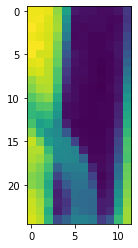

In [7]:
plt.imshow(new_test['img'][400])

What the computer see:

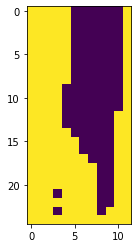

In [8]:
plt.imshow(new_test['img_2'][400])

Manage dimensions of the image

In [9]:
new_test['img_conc'] = ""
for i, e in enumerate(new_test['img_2']):
    new_test['img_conc'][i] = list(np.concatenate(new_test['img_2'][i]))
inp = list(new_test['img_conc'])

We train our model on 8 different number of clusters and take the "elbow" value

The maximum number of train epochs is reached
[0. 0. 0. ... 1. 1. 0.]
The maximum number of train epochs is reached
[4. 4. 4. ... 1. 1. 1.]
The maximum number of train epochs is reached
[8. 8. 8. ... 2. 2. 2.]
The maximum number of train epochs is reached
[10. 10. 10. ...  3.  4.  2.]
The maximum number of train epochs is reached
[16. 16. 16. ...  7.  7.  7.]
The maximum number of train epochs is reached
[21. 21. 21. ...  3. 12.  8.]
The maximum number of train epochs is reached
[24. 24. 20. ...  5.  5.  6.]
The maximum number of train epochs is reached
[28. 28. 16. ...  6. 12.  7.]


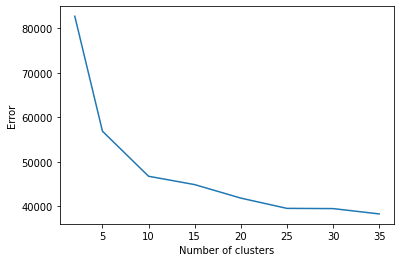

In [10]:
(predic, error_2) = cann_compute(inp, 2)
(predic, error_5) = cann_compute(inp, 5)
(predic, error_10) = cann_compute(inp, 10)
(predic, error_15) = cann_compute(inp, 15)
(predic, error_20) = cann_compute(inp, 20)
(predic, error_25) = cann_compute(inp, 25)
(predic, error_30) = cann_compute(inp, 30)
(predic, error_35) = cann_compute(inp, 35)
plt.plot([2, 5, 10, 15, 20, 25, 30, 35],
        [error_2, error_5, error_10, error_15, error_20, error_25, error_30, error_35])
plt.ylabel('Error')
plt.xlabel('Number of clusters')
plt.show()

The elbow value seem to be 20

In [11]:
(predic, error) = cann_compute(inp, 20)
new_test['degree'] = predic

The maximum number of train epochs is reached
[15. 15. 15. ...  8.  8.  5.]


This below show the tufts: with highest degree of detachment on top to lowest degree of detachment on bottom

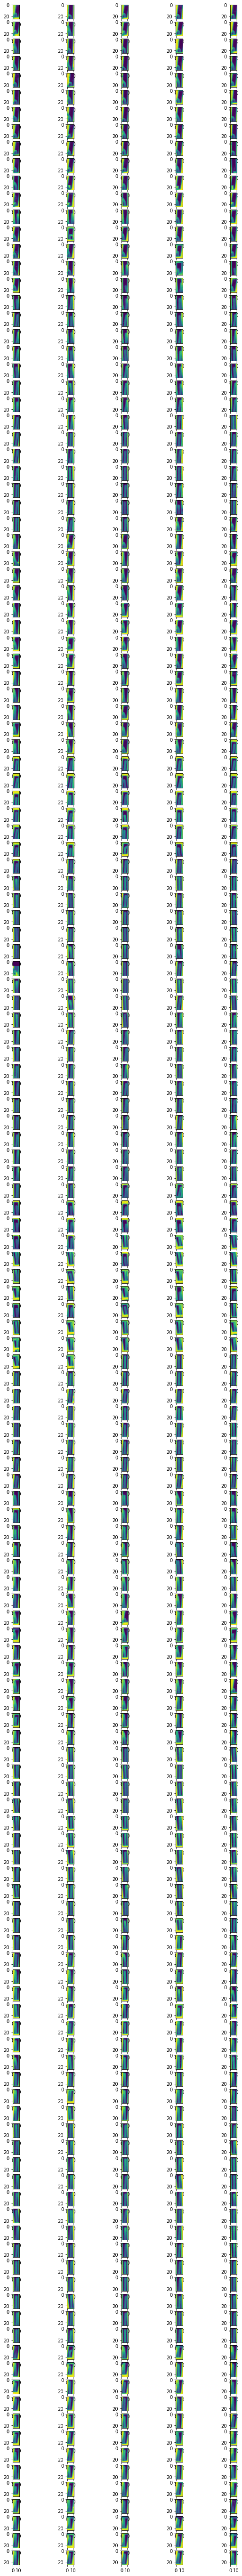

In [16]:
fig = plt.figure(figsize=(10, 100))
columns = 5
rows = 150
new_test_2 = new_test.sort_values(by=['degree']).reset_index()
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(new_test_2['img'][i])
plt.show()

In [13]:
def f(x):
    plt.imshow((new_test[new_test['degree'] == x].reset_index())['img'][7])

In [14]:
widgets.interact(f, x=widgets.FloatSlider(min=0, max=19, step=1, value=19));

interactive(children=(FloatSlider(value=19.0, description='x', max=19.0, step=1.0), Output()), _dom_classes=('…